In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import dash
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

In [2]:
# Data Cleaning

In [3]:
artist_df = pd.read_csv("/Users/jason/Desktop/Museam-of-Modern-Art/Artists.csv")
artwork_df = pd.read_csv("/Users/jason/Desktop/Museam-of-Modern-Art/Artworks.csv")

In [4]:
artist_df

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,male,1941,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
15633,138522,Erwin Heerich,"German, 1922 – 2004",German,male,1922,2004,NaN,NaN
15634,138540,Rafael Rivera García,"Puerto Rican, 1929 – 2014",Puerto Rican,male,1929,2014,NaN,NaN
15635,138541,Rafael López del Campo,"Puerto Rican, 1936 – 2009",Puerto Rican,male,1936,2009,NaN,NaN
15636,138544,Efrain Lopez,"Puerto Rican, 1940 – 1993",Puerto Rican,male,1940,1993,NaN,NaN


In [5]:
artist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15638 entries, 0 to 15637
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ConstituentID  15638 non-null  int64  
 1   DisplayName    15638 non-null  object 
 2   ArtistBio      13438 non-null  object 
 3   Nationality    13142 non-null  object 
 4   Gender         12381 non-null  object 
 5   BeginDate      15638 non-null  int64  
 6   EndDate        15638 non-null  int64  
 7   Wiki QID       3247 non-null   object 
 8   ULAN           2931 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 1.1+ MB


In [6]:
artist_df.EndDate.value_counts()

EndDate
0       10035
1991       91
1999       89
2004       88
2005       87
        ...  
1795        1
1888        1
1869        1
1855        1
1852        1
Name: count, Length: 173, dtype: int64

In [7]:
artist_df['EndDate2'] = artist_df['ArtistBio'].str.extract(r'(?i)\bborn\s+(\d{4})')

In [8]:
artist_df.EndDate2.isna().sum()

10005

In [9]:
artist_df["FinalEndDate"] = artist_df["EndDate"].fillna(artist_df["EndDate2"])

In [10]:
artist_df["FinalEndDate"] = np.where(artist_df["EndDate"] == 0, artist_df["EndDate2"], artist_df["EndDate"])

In [11]:
artist_df.FinalEndDate = artist_df.FinalEndDate.fillna(0)

In [12]:
artist_df.FinalEndDate.value_counts()

FinalEndDate
0       4412
1942     144
1941     137
1946     134
1947     132
        ... 
1865       1
1855       1
1873       1
1881       1
1821       1
Name: count, Length: 290, dtype: int64

In [13]:
artwork_df

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,OnView,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(male),1896,Ink and cut-and-pasted painted pages on paper,...,NaN,NaN,NaN,NaN,48.600000,NaN,NaN,168.900000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(male),1987,Paint and colored pencil on print,...,NaN,NaN,NaN,NaN,40.640100,NaN,NaN,29.845100,NaN,NaN
2,"Villa project, outside Vienna, Austria (Elevat...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,NaN,NaN,NaN,NaN,34.300000,NaN,NaN,31.800000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(male),1980,Photographic reproduction with colored synthet...,...,NaN,NaN,NaN,NaN,50.800000,NaN,NaN,50.800000,NaN,NaN
4,"Villa project, outside Vienna, Austria (Exteri...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,NaN,NaN,NaN,NaN,38.400000,NaN,NaN,19.100000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157625,Untitled,Adam Pendleton,38901,"(American, born 1984)",(American),(1984),(0),(male),2021,Silkscreen ink on Mylar,...,NaN,NaN,NaN,NaN,96.520193,NaN,NaN,73.660147,NaN,NaN
157626,Untitled,Adam Pendleton,38901,"(American, born 1984)",(American),(1984),(0),(male),2021,Silkscreen ink on Mylar,...,NaN,NaN,NaN,NaN,96.520193,NaN,NaN,73.660147,NaN,NaN
157627,Untitled,Adam Pendleton,38901,"(American, born 1984)",(American),(1984),(0),(male),2021,Silkscreen ink on Mylar,...,NaN,NaN,NaN,NaN,96.520193,NaN,NaN,73.660147,NaN,NaN
157628,Untitled,Adam Pendleton,38901,"(American, born 1984)",(American),(1984),(0),(male),2021,Silkscreen ink on Mylar,...,NaN,NaN,NaN,NaN,96.520193,NaN,NaN,73.660147,NaN,NaN


In [14]:
artwork_df.Medium.value_counts()

Medium
Gelatin silver print                                                                                                                                                                                                                                              17012
Lithograph                                                                                                                                                                                                                                                         8633
Pencil on paper                                                                                                                                                                                                                                                    7233
Albumen silver print                                                                                                                                                                                     

In [15]:
artwork_df.ObjectID.nunique()

157630

In [16]:
artwork_df.Classification.nunique()

39

In [17]:
artwork_df.Nationality.nunique()

1120

# T1

## Cards

In [19]:
app = dash.Dash(__name__)

def combined_card_1(metrics, bg_colour="#2D2D2D", text_colour="#FFFFFF"):
    return html.Div(
        style={
            'backgroundColor': bg_colour,
            'color': text_colour, 
            'borderRadius': '15px',
            'padding': '20px',
            'width': '250px', 
            'boxShadow': '0px 4px 10px rgba(0, 0, 0, 0.5)',
            'margin': '5px',
            'border': '1px solid #444444',
            'fontFamily': 'Roboto, sans-serif'             
        },
        children=[
            html.H2('Dataset', style={'fontSize':'25px','marginTop': '0px' ,'marginBottom': '20px', 'color': '#858383'}),
            html.Div([
                html.P(f"Artists.csv Rows: {metrics['artist_num_feats']}"),
                html.P(f"Artworks.csv Rows: {metrics['artwork_num_feats']}", style={'margin': '10px 0'}),
                html.P(f"Memory: {metrics['memory']}"),
            ], style={'textAlign': 'left', 'fontSize': '16px'})
        ]
    )
def combined_card_2(metrics, bg_colour="#2D2D2D", text_colour="#FFFFFF"):
    return html.Div(
        style={
            'backgroundColor': bg_colour,
            'color': text_colour,
            'borderRadius': '15px',
            'padding': '20px',
            'width': '250px',
            'boxShadow': '0px 4px 10px rgba(0, 0, 0, 0.5)',
            'margin': '5px',
            'border': '1px solid #444444',
            'fontFamily': 'Roboto, sans-serif',
        },
        children=[
            html.H2('Artists', style={'fontSize': '25px','marginTop': '0px', 'marginBottom': '0px', 'color': '#858383', 'textAlign': 'center'}),
            html.Div([
                html.P(f"{metrics['num_artists']}"),
            ], style={'textAlign': 'center', 'fontSize': '35px', 'marginTop': '0px', 'marginBottom': '0px'})
        ]
    )

def combined_card_3(metrics, bg_color='#2D2D2D', text_colour='#FFFFFF'):
    return html.Div(
        style={
            'backgroundColor': bg_color,
            'color': text_colour,
            'borderRadius': '15px',
            'padding': '20px',
            'width': '250px',
            'boxShadow': '0px 4px 10px rgba(0, 0, 0, 0.5)',
            'margin': '5px',
            'border': '1px solid #444444',
            'fontFamily': 'Roboto, sans-serif',
        },
        children=[
            html.H2('Artworks', style={'fontSize': '25px','marginTop': '0px', 'marginBottom': '0px', 'color': '#858383', 'textAlign': 'center'}),
            html.Div([
                html.P(f"{metrics['num_artworks']}"),
        ], style = {'textAlign': 'center', 'fontSize': '35px', 'marginTop': '0px', 'marginBottom': '0px'})
    ]
)

def combined_card_4(metrics, bg_color= '#2D2D2D', text_colour='#FFFFFF'):
    return html.Div(
        style={
            'backgroundColor': bg_color,
            'color': text_colour,
            'borderRadius': '15px',
            'padding': '20px',
            'width': '250px',
            'boxShadow': '0px 4px 10px rgba(0, 0, 0, 0.5)',
            'margin': '5px',
            'border': '1px solid #444444',
            'fontFamily': 'Roboto, sans-serif',
        }, 
        children=[
            html.H2('Nationalities', style={'fontSize': '25px','marginTop': '0px', 'marginBottom': '0px', 'color': '#858383', 'textAlign': 'center'}),
            html.Div([
                html.P(f"{metrics['num_nationalities']}"),
        ], style = {'textAlign': 'center', 'fontSize': '35px', 'marginTop': '0px', 'marginBottom': '0px'})
    ]
)

def combined_card_5(metrics, bg_color= '#2D2D2D', text_colour='#FFFFFF'):
    return html.Div(
        style={
            'backgroundColor': bg_color,
            'color': text_colour,
            'borderRadius': '15px',
            'padding': '20px',
            'width': '250px',
            'boxShadow': '0px 4px 10px rgba(0, 0, 0, 0.5)',
            'margin': '5px',
            'border': '1px solid #444444',
            'fontFamily': 'Roboto, sans-serif',
        }, 
        children=[
            html.H2('Classifications', style={'fontSize': '25px','marginTop': '0px', 'marginBottom': '0px', 'color': '#858383', 'textAlign': 'center'}),
            html.Div([
                html.P(f"{metrics['num_classifications']}"),
        ], style = {'textAlign': 'center', 'fontSize': '35px', 'marginTop': '0px', 'marginBottom': '0px'})
    ]
)

artist_num_feats = "{:,}".format(len(artist_df))
artwork_num_feats = "{:,}".format(len(artwork_df))
memory = "72MB"
num_artists = "{:,}".format(len(artist_df))
num_artworks = "{:,}".format(artwork_df.ObjectID.nunique())
num_nationalities = artist_df.Nationality.nunique()
num_classifications = artist_df.Nationality.nunique()

app.layout = html.Div(
    style={
        'display': 'flex',
        'justifyContent': 'center',
        'alignItems': 'center',
        'flexWrap': 'nowrap',
        'gap': '20px',
        'backgroundColor': '#1E1E1E', 
        'padding': '20px'
    },
    children=[
        combined_card_1(metrics={
            "artist_num_feats": artist_num_feats,
            "artwork_num_feats": artwork_num_feats,
            "memory": memory,
        }),
        combined_card_2(metrics={
            "num_artists": num_artists,
        }),
        combined_card_3(metrics={
            "num_artworks": num_artworks,
        }),
        combined_card_4(metrics={
            "num_nationalities": num_nationalities,
        }),
        combined_card_5(metrics={
            "num_classifications": num_classifications,
        }),
    ]
)

if __name__ == '__main__':
    app.run_server(debug=True)

## Figures

In [21]:
artwork_df['painting_size'] = artwork_df['Height (cm)']* artwork_df['Width (cm)']

In [22]:
artwork_df['Date'] = artwork_df['Date'].replace('n.d.', '0')
artwork_df['Date'] = artwork_df['Date'].str.split('-').str[0]
artwork_df['Date'] = artwork_df['Date'].str.split('.').str[0]
artwork_df['Date'] = pd.to_numeric(artwork_df['Date'], errors='coerce')

In [23]:
artwork_df['decades'] = artwork_df['Date'] // 10 * 10

In [24]:
average_painting_size = artwork_df.groupby('decades', as_index=False)['painting_size'].mean()

In [25]:
artwork_df

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.),painting_size,decades
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(male),1896.0,Ink and cut-and-pasted painted pages on paper,...,NaN,NaN,48.600000,NaN,NaN,168.900000,NaN,NaN,8208.540000,1890.0
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(male),1987.0,Paint and colored pencil on print,...,NaN,NaN,40.640100,NaN,NaN,29.845100,NaN,NaN,1212.907849,1980.0
2,"Villa project, outside Vienna, Austria (Elevat...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903.0,"Graphite, pen, color pencil, ink, and gouache ...",...,NaN,NaN,34.300000,NaN,NaN,31.800000,NaN,NaN,1090.740000,1900.0
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(male),1980.0,Photographic reproduction with colored synthet...,...,NaN,NaN,50.800000,NaN,NaN,50.800000,NaN,NaN,2580.640000,1980.0
4,"Villa project, outside Vienna, Austria (Exteri...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903.0,"Graphite, color pencil, ink, and gouache on tr...",...,NaN,NaN,38.400000,NaN,NaN,19.100000,NaN,NaN,733.440000,1900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157625,Untitled,Adam Pendleton,38901,"(American, born 1984)",(American),(1984),(0),(male),2021.0,Silkscreen ink on Mylar,...,NaN,NaN,96.520193,NaN,NaN,73.660147,NaN,NaN,7109.691639,2020.0
157626,Untitled,Adam Pendleton,38901,"(American, born 1984)",(American),(1984),(0),(male),2021.0,Silkscreen ink on Mylar,...,NaN,NaN,96.520193,NaN,NaN,73.660147,NaN,NaN,7109.691639,2020.0
157627,Untitled,Adam Pendleton,38901,"(American, born 1984)",(American),(1984),(0),(male),2021.0,Silkscreen ink on Mylar,...,NaN,NaN,96.520193,NaN,NaN,73.660147,NaN,NaN,7109.691639,2020.0
157628,Untitled,Adam Pendleton,38901,"(American, born 1984)",(American),(1984),(0),(male),2021.0,Silkscreen ink on Mylar,...,NaN,NaN,96.520193,NaN,NaN,73.660147,NaN,NaN,7109.691639,2020.0


In [26]:
average_painting_size

,decades,painting_size
0,0.0,1708.861432
1,1760.0,309.120000
2,1780.0,69.160000
3,1790.0,324.006543
4,1800.0,253.480000
5,1810.0,129.660804
6,1820.0,584.502105
7,1830.0,393.730000
8,1840.0,258.102053
9,1850.0,450.743979


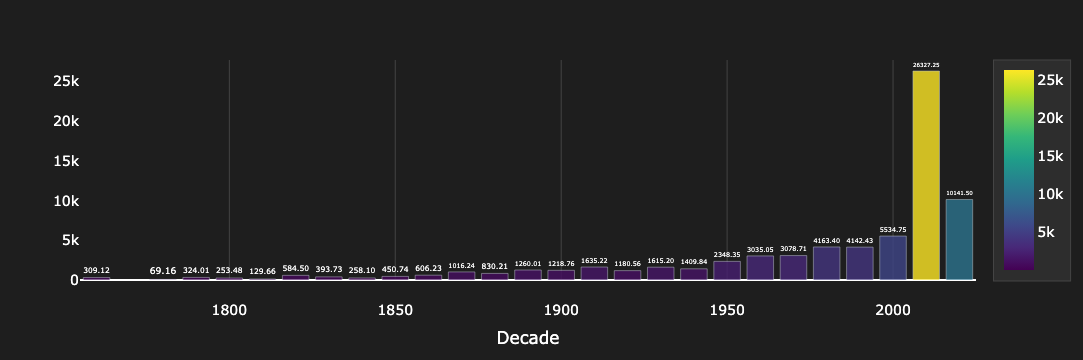

In [224]:
average_painting_size = artwork_df.groupby('decades', as_index=False)['painting_size'].mean()
filtered_data = average_painting_size[average_painting_size['decades'] >= 1700]

T1fig1 = px.bar(
    filtered_data,
    x='decades',          
    y='painting_size',
    text='painting_size',     
    title="",  
    color='painting_size',     
    color_continuous_scale=px.colors.sequential.Viridis 
)

T1fig1.update_traces(
    texttemplate='%{text:.2f}', 
    textposition='outside',     
    marker=dict(opacity=0.8)    
)

T1fig1.update_layout(
    plot_bgcolor="#1E1E1E",      
    paper_bgcolor="#1E1E1E",    
    font=dict(color="#FFFFFF", size=14), 
    title=dict(font=dict(size=20, color="#00CED1"), x=0.5),
    xaxis=dict(
        title="Decade",     
        color="#FFFFFF",       
        gridcolor="#444444", 
        zeroline=False,
        ticklabelstandoff=20
    ),
    yaxis=dict(
        title="",   
        color="#FFFFFF",       
        showgrid=False          
    ),
    coloraxis_colorbar=dict(
        title="",  
        tickcolor="#FFFFFF",   
        titlefont=dict(color="#FFFFFF"), 
        bgcolor="#2D2D2D",      
        bordercolor="#444444",   
        borderwidth=1         
    )
)

T1fig1.show()

In [28]:
artwork_df['DateAcquired'] = artwork_df['DateAcquired'].str.split('-').str[0]

In [29]:
artwork_df['DateAcquired'] = pd.to_numeric(artwork_df['DateAcquired'])

In [30]:
artwork_df

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.),painting_size,decades
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(male),1896.0,Ink and cut-and-pasted painted pages on paper,...,NaN,NaN,48.600000,NaN,NaN,168.900000,NaN,NaN,8208.540000,1890.0
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(male),1987.0,Paint and colored pencil on print,...,NaN,NaN,40.640100,NaN,NaN,29.845100,NaN,NaN,1212.907849,1980.0
2,"Villa project, outside Vienna, Austria (Elevat...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903.0,"Graphite, pen, color pencil, ink, and gouache ...",...,NaN,NaN,34.300000,NaN,NaN,31.800000,NaN,NaN,1090.740000,1900.0
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(male),1980.0,Photographic reproduction with colored synthet...,...,NaN,NaN,50.800000,NaN,NaN,50.800000,NaN,NaN,2580.640000,1980.0
4,"Villa project, outside Vienna, Austria (Exteri...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903.0,"Graphite, color pencil, ink, and gouache on tr...",...,NaN,NaN,38.400000,NaN,NaN,19.100000,NaN,NaN,733.440000,1900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157625,Untitled,Adam Pendleton,38901,"(American, born 1984)",(American),(1984),(0),(male),2021.0,Silkscreen ink on Mylar,...,NaN,NaN,96.520193,NaN,NaN,73.660147,NaN,NaN,7109.691639,2020.0
157626,Untitled,Adam Pendleton,38901,"(American, born 1984)",(American),(1984),(0),(male),2021.0,Silkscreen ink on Mylar,...,NaN,NaN,96.520193,NaN,NaN,73.660147,NaN,NaN,7109.691639,2020.0
157627,Untitled,Adam Pendleton,38901,"(American, born 1984)",(American),(1984),(0),(male),2021.0,Silkscreen ink on Mylar,...,NaN,NaN,96.520193,NaN,NaN,73.660147,NaN,NaN,7109.691639,2020.0
157628,Untitled,Adam Pendleton,38901,"(American, born 1984)",(American),(1984),(0),(male),2021.0,Silkscreen ink on Mylar,...,NaN,NaN,96.520193,NaN,NaN,73.660147,NaN,NaN,7109.691639,2020.0


In [31]:
average_acquisitions_size = artwork_df.groupby('decades', as_index=False)['DateAcquired'].count()
filtered_DateAcquired_data = average_acquisitions_size[average_acquisitions_size['decades'] >= 1760]

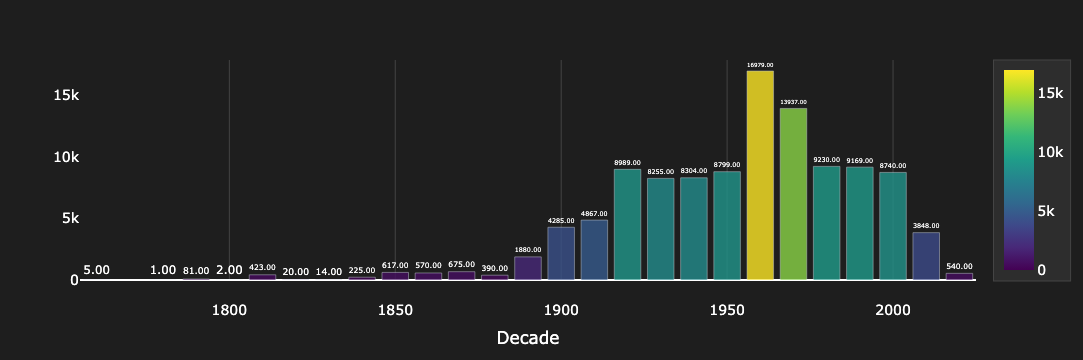

In [223]:
T1fig2 = px.bar(
    filtered_DateAcquired_data,
    x='decades',              
    y='DateAcquired',     
    text='DateAcquired',      
    title="", 
    color='DateAcquired',   
    color_continuous_scale=px.colors.sequential.Viridis  
)


T1fig2.update_traces(
    texttemplate='%{text:.2f}', 
    textposition='outside',     
    marker=dict(opacity=0.8)    
)

T1fig2.update_layout(
    plot_bgcolor="#1E1E1E",      
    paper_bgcolor="#1E1E1E",    
    font=dict(color="#FFFFFF", size=14), 
    title=dict(font=dict(size=20, color="#00CED1"), x=0.5),
    xaxis=dict(
        title="Decade",     
        color="#FFFFFF",       
        gridcolor="#444444", 
        zeroline=False,
        ticklabelstandoff=20
    ),
    yaxis=dict(
        title="",   
        color="#FFFFFF",       
        showgrid=False          
    ),
    coloraxis_colorbar=dict(
        title="",  
        tickcolor="#FFFFFF",   
        titlefont=dict(color="#FFFFFF"), 
        bgcolor="#2D2D2D",      
        bordercolor="#444444",   
        borderwidth=1         
    )
)

T1fig2.show()

In [33]:
top_classifications = artwork_df['Classification'].value_counts().head(5).reset_index()
top_classifications.columns = ['Classification', 'Count']

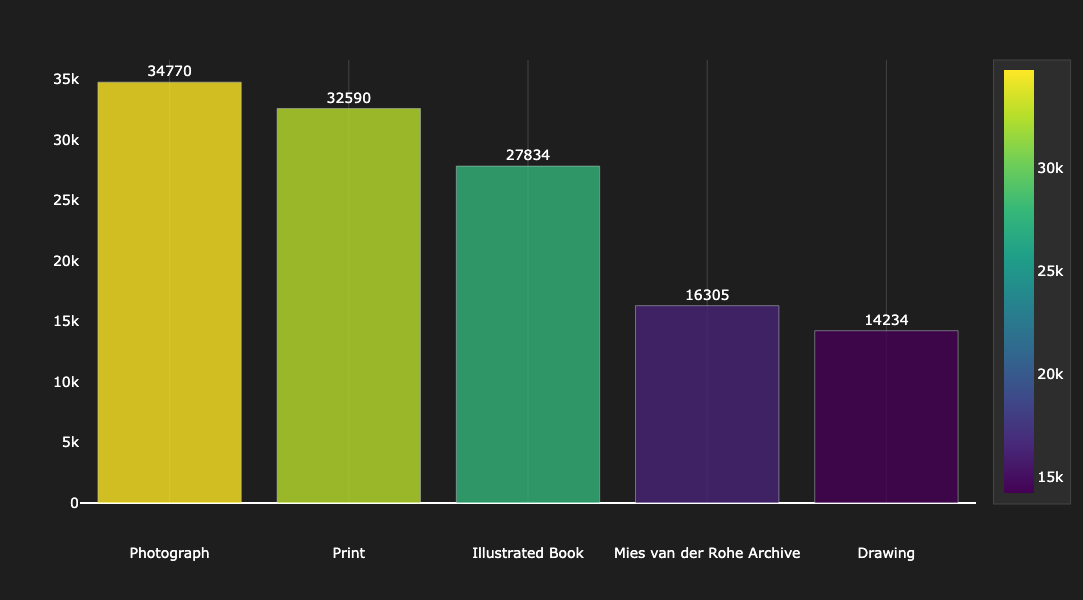

In [225]:
T1fig3 = px.bar(
    top_classifications,
    x='Classification',
    y='Count',
    text='Count',
    title="",
    color='Count',
    color_continuous_scale=px.colors.sequential.Viridis
)

T1fig3.update_traces(
    texttemplate='%{text:.0f}',
    textposition='outside',
    marker=dict(opacity=0.8)
)

T1fig3.update_layout(
    plot_bgcolor="#1E1E1E",
    paper_bgcolor="#1E1E1E",
    font=dict(color="#FFFFFF", size=14),
    title=dict(font=dict(size=40, color="#00CED1"), x=0.5),
    xaxis=dict(
        title="",
        color="#FFFFFF",
        gridcolor="#444444",
        zeroline=False,
        ticklabelstandoff=40
    ),
    yaxis=dict(
        title="",
        color="#FFFFFF",
        showgrid=False
    ),
    coloraxis_colorbar=dict(
        title="",
        tickcolor="#FFFFFF",
        titlefont=dict(color="#FFFFFF"),
        bgcolor="#2D2D2D",
        bordercolor="#444444",
        borderwidth=1
    ),
    height=600 
)

T1fig3.show()

In [35]:
artwork_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157630 entries, 0 to 157629
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Title               157582 non-null  object 
 1   Artist              156361 non-null  object 
 2   ConstituentID       156361 non-null  object 
 3   ArtistBio           151542 non-null  object 
 4   Nationality         156361 non-null  object 
 5   BeginDate           156361 non-null  object 
 6   EndDate             156361 non-null  object 
 7   Gender              156361 non-null  object 
 8   Date                117570 non-null  float64
 9   Medium              148383 non-null  object 
 10  Dimensions          148971 non-null  object 
 11  CreditLine          156080 non-null  object 
 12  AccessionNumber     157630 non-null  object 
 13  Classification      157630 non-null  object 
 14  Department          157630 non-null  object 
 15  DateAcquired        150881 non-nul

In [36]:
top_years = (artwork_df.groupby('DateAcquired').size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(10))
top_years

,DateAcquired,Count
39,1968.0,19733
35,1964.0,12998
79,2008.0,7176
72,2001.0,4170
76,2005.0,4054
86,2015.0,3817
45,1974.0,3394
84,2013.0,3109
83,2012.0,2943
85,2014.0,2829


In [37]:
yearly_counts = (artwork_df.groupby('DateAcquired').size().reset_index(name='Count').sort_values(by='DateAcquired'))

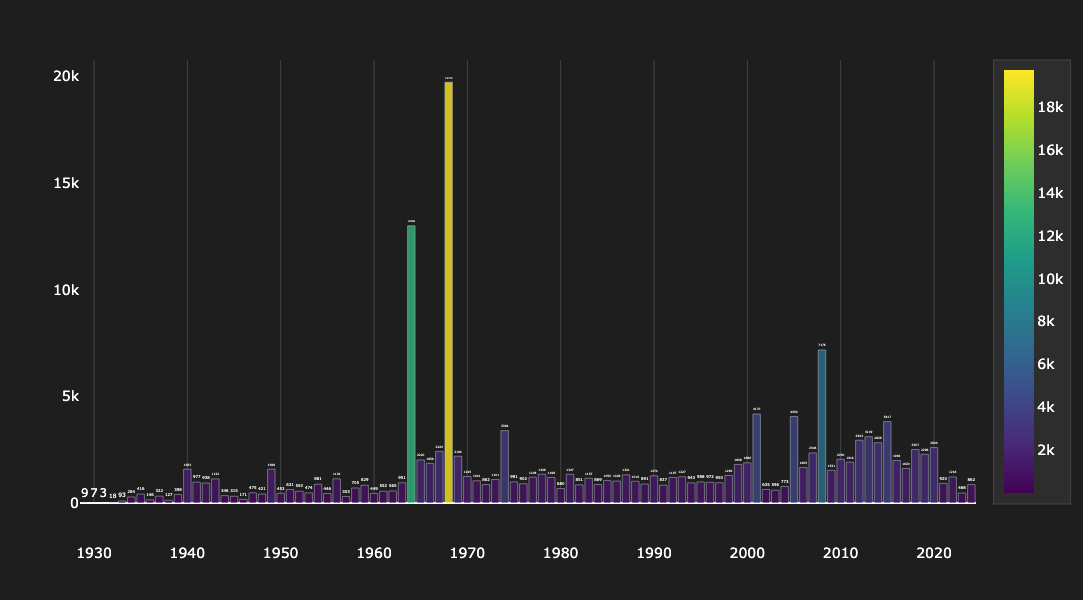

In [226]:
T1fig5 = px.bar(
    yearly_counts,
    x='DateAcquired',
    y='Count',
    text='Count',
    title="",
    color='Count',
    color_continuous_scale=px.colors.sequential.Viridis
)

T1fig5.update_traces(
    texttemplate='%{text:.0f}',
    textposition='outside',
    marker=dict(opacity=0.8)
)

T1fig5.update_layout(
    plot_bgcolor="#1E1E1E",
    paper_bgcolor="#1E1E1E",
    font=dict(color="#FFFFFF", size=14),
    title=dict(font=dict(size=40, color="#00CED1"), x=0.5),
    xaxis=dict(
        title="",
        color="#FFFFFF",
        gridcolor="#444444",
        zeroline=False,
        ticklabelstandoff=40
    ),
    yaxis=dict(
        title="",
        color="#FFFFFF",
        showgrid=False
    ),
    coloraxis_colorbar=dict(
        title="",
        tickcolor="#FFFFFF",
        titlefont=dict(color="#FFFFFF"),
        bgcolor="#2D2D2D",
        bordercolor="#444444",
        borderwidth=1
    ),
    height=600 
)

T1fig5.show()

## Tab

In [39]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Museum of Modern Art", style={'textAlign': 'center'}),
    dcc.Tabs([

        dcc.Tab(label="About the Museum", children=[
         html.Div([
             html.Div(
                 style={
                     'display': 'flex',
                     'justifyContent': 'center', 
                     'alignItems': 'center', 
                     'flexWrap': 'nowrap',
                     'gap': '20px',
                     'marginBottom' : "30px"
                 }, 
                 children=[
                    combined_card_1(metrics={
                    "artist_num_feats": artist_num_feats,
                    "artwork_num_feats": artwork_num_feats,
                    "memory": memory,
                    }),
                     combined_card_2(metrics={
                    "num_artists": num_artists,
                    }),
                    combined_card_3(metrics={
                    "num_artworks": num_artworks,
                    }),
                    combined_card_4(metrics={
                    "num_nationalities": num_nationalities,
                    }),
                    combined_card_5(metrics={
                    "num_classifications": num_classifications,
                    }), 
                 ]
             ),
             html.Div(
                 style={
                     'display':'grid'
                     'gridTemplateColumns' 'repeat(2, 1fr)',
                     'gap': '20px',
                     'margin': '20px',
                 },
                 children=[
                     html.Div([
                         html.H3('Average Painting Sizes by Decade', style={'textAlign': 'center'}),
                         dcc.Graph(figure=T1fig1)
                     ]),
                     html.Div([
                         html.Div('Average Acquisitions by Decade', style={'textAlign': 'center'}),
                         dcc.Graph(figure=T1fig2)
                     ]), 
                     html.Div([
                         html.Div("Top 5 Classifications", style={'textAlign': 'center'}),
                         dcc.Graph(figure=T1fig3)
                     ]), 
                     html.Div([
                         html.Div("Acquisitions over the Years", style={'textAlign': 'center'}),
                         dcc.Graph(figure=T1fig5)
                    ])
                ]
            )
        ])
    ]),

    dcc.Tab(label='Throughout the Years',children=[
        html.Div([
            html.H3('Average Painting Sizes by Decade', style={'textAlign': 'center'}), 
            dcc.Graph(figure=T1fig1),
            ])
        ]),
        
    dcc.Tab(label='Artists',children=[
        html.Div([
            html.H3('Average Painting Sizes by Decade', style={'textAlign': 'center'}), 
            dcc.Graph(figure=T1fig2),
            ])
        ]),
    ])
])

if __name__ == '__main__':
    app.run_server(debug=True)

# T2

## Figures

In [40]:
artwork_df.Gender.value_counts()

Gender
(male)                                                                                                                                                                                                                       121010
(female)                                                                                                                                                                                                                      19608
()                                                                                                                                                                                                                             7750
(male) (male)                                                                                                                                                                                                                  1706
(male) (male) (male)                                                             

In [41]:
def classify_only_male(gender):
    if not isinstance(gender, str):  
        return gender
    gender = gender.lower()  
    if "male" in gender and "female" not in gender:  
        return "Male"
    return gender  
artwork_df['Gender'] = artwork_df['Gender'].apply(classify_only_male)

In [42]:
artwork_df['Gender'].value_counts()

Gender
Male                                                                                            125785
(female)                                                                                         19608
()                                                                                                7750
(male) (female)                                                                                    945
(female) (male)                                                                                    383
                                                                                                 ...  
(male) (female) (male) (male) (male) (male) (male) () (male) (male) () (male)                        1
(female) (male) (female) (male) (male) (female) (male) (male) (male) (male) (male) (male) ()         1
(female) () () (male) (male) (male) (male) (male) (male) (male) () (male) (male) (male)              1
(male) (male) (male) (male) (male) (male) (male) (male) (female) (

In [43]:
def classify_only_male(gender):
    if not isinstance(gender, str):  
        return gender
    if "female" in gender:  
        return "Female"
    return gender  
artwork_df['Gender'] = artwork_df['Gender'].apply(classify_only_male)

In [44]:
artwork_df['Gender'].value_counts()

Gender
Male                       125785
Female                      22625
()                           7750
() ()                         155
() () ()                       25
(non-binary)                   12
() () () () ()                  3
() () () ()                     2
(gender non-conforming)         2
() () () () () ()               1
(transgender woman)             1
Name: count, dtype: int64

In [45]:
def classify_only_male(gender):
    if not isinstance(gender, str):  
        return gender
    if "()" in gender:  
        return "Unkown"
    return gender  
artwork_df['Gender'] = artwork_df['Gender'].apply(classify_only_male)

In [46]:
artwork_df['Gender'].value_counts()

Gender
Male                       125785
Female                      22625
Unkown                       7936
(non-binary)                   12
(gender non-conforming)         2
(transgender woman)             1
Name: count, dtype: int64

In [47]:
def classify_only_male(gender):
    if not isinstance(gender, str):  
        return "Other"  
    if "Male" in gender or "Female" in gender or "Unkown" in gender:  
        return gender
    return "Other" 
artwork_df['Gender'] = artwork_df['Gender'].apply(classify_only_male)

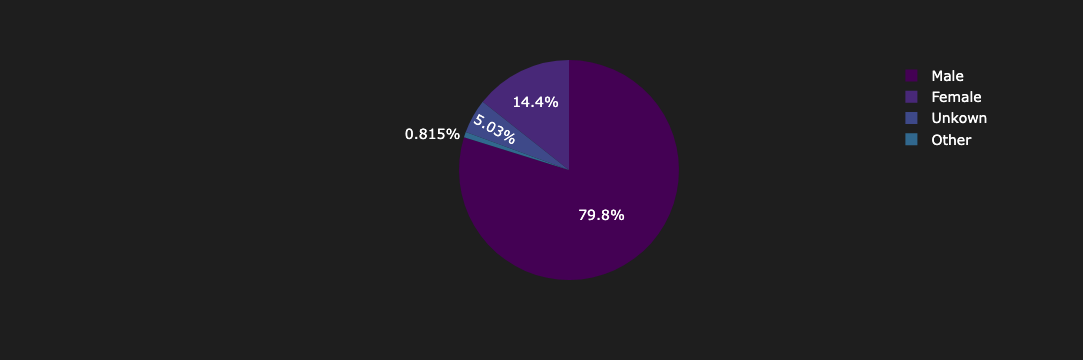

In [114]:
gender_counts = artwork_df['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

T2fig1 = px.pie(
    gender_counts,
    names='Gender',            
    values='Count',             
    title="",  
    color='Gender',     
    color_discrete_sequence=px.colors.sequential.Viridis  
)

T2fig1.update_layout(
    plot_bgcolor="#1E1E1E",      
    paper_bgcolor="#1E1E1E",
    font=dict(color="#FFFFFF", size=14),  
    title=dict(font=dict(size=40, color="#00CED1"), x=0.5) 
)

T2fig1.show()

In [49]:
artist_df

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN,EndDate2,FinalEndDate
0,1,Robert Arneson,"American, 1930–1992",American,male,1930,1992,NaN,NaN,NaN,1992
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,male,1936,0,NaN,NaN,1936,1936
2,3,Bill Arnold,"American, born 1941",American,male,1941,0,NaN,NaN,1941,1941
3,4,Charles Arnoldi,"American, born 1946",American,male,1946,0,Q1063584,500027998.0,1946,1946
4,5,Per Arnoldi,"Danish, born 1941",Danish,male,1941,0,NaN,NaN,1941,1941
...,...,...,...,...,...,...,...,...,...,...,...
15633,138522,Erwin Heerich,"German, 1922 – 2004",German,male,1922,2004,NaN,NaN,NaN,2004
15634,138540,Rafael Rivera García,"Puerto Rican, 1929 – 2014",Puerto Rican,male,1929,2014,NaN,NaN,NaN,2014
15635,138541,Rafael López del Campo,"Puerto Rican, 1936 – 2009",Puerto Rican,male,1936,2009,NaN,NaN,NaN,2009
15636,138544,Efrain Lopez,"Puerto Rican, 1940 – 1993",Puerto Rican,male,1940,1993,NaN,NaN,NaN,1993


In [50]:
artist_df['lifespan'] = (artist_df['EndDate'])-(artist_df['BeginDate'])

In [51]:
def clean_deaths(value):
    if len(str(value)) > 3:
        return None  
        
    if value < 18:
        return None
        
    return value  

In [52]:
artist_df['lifespan'] = artist_df['lifespan'].apply(clean_deaths)

In [53]:
artist_df['lifespan']

0        62.0
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
15633    82.0
15634    85.0
15635    73.0
15636    53.0
15637     NaN
Name: lifespan, Length: 15638, dtype: float64

In [55]:
avg_age = (artist_df.groupby('lifespan').size().reset_index(name='Count').sort_values(by='lifespan'))

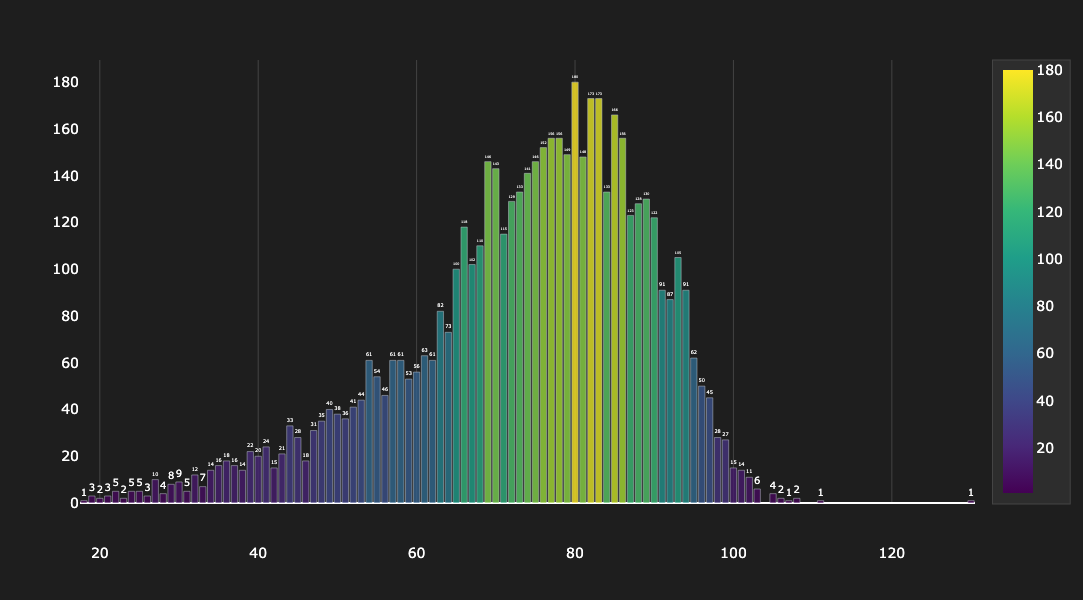

In [236]:
T2fig2 = px.bar(
    avg_age,
    x='lifespan',
    y='Count',
    text='Count',
    title="",
    color='Count',
    color_continuous_scale=px.colors.sequential.Viridis
)

T2fig2.update_traces(
    texttemplate='%{text:.0f}',
    textposition='outside',
    marker=dict(opacity=0.8)
)

T2fig2.update_layout(
    plot_bgcolor="#1E1E1E",
    paper_bgcolor="#1E1E1E",
    font=dict(color="#FFFFFF", size=14),
    title=dict(font=dict(size=40, color="#00CED1"), x=0.5),
    xaxis=dict(
        title="",
        color="#FFFFFF",
        gridcolor="#444444",
        zeroline=False,
        ticklabelstandoff=40
    ),
    yaxis=dict(
        title="",
        color="#FFFFFF",
        showgrid=False
    ),
    coloraxis_colorbar=dict(
        title="",
        tickcolor="#FFFFFF",
        titlefont=dict(color="#FFFFFF"),
        bgcolor="#2D2D2D",
        bordercolor="#444444",
        borderwidth=1
    ),
    height=600 
)

T2fig2.show()

In [57]:
avg_birth = (artist_df.groupby('BeginDate').size().reset_index(name='Count').sort_values(by='BeginDate'))

In [58]:
avg_birth = avg_birth[avg_birth['BeginDate'] >= 1730]

In [59]:
avg_birth

,BeginDate,Count
2,1730,1
3,1731,1
4,1746,1
5,1753,1
6,1765,1
...,...,...
232,2013,1
233,2014,4
234,2015,1
235,2016,3


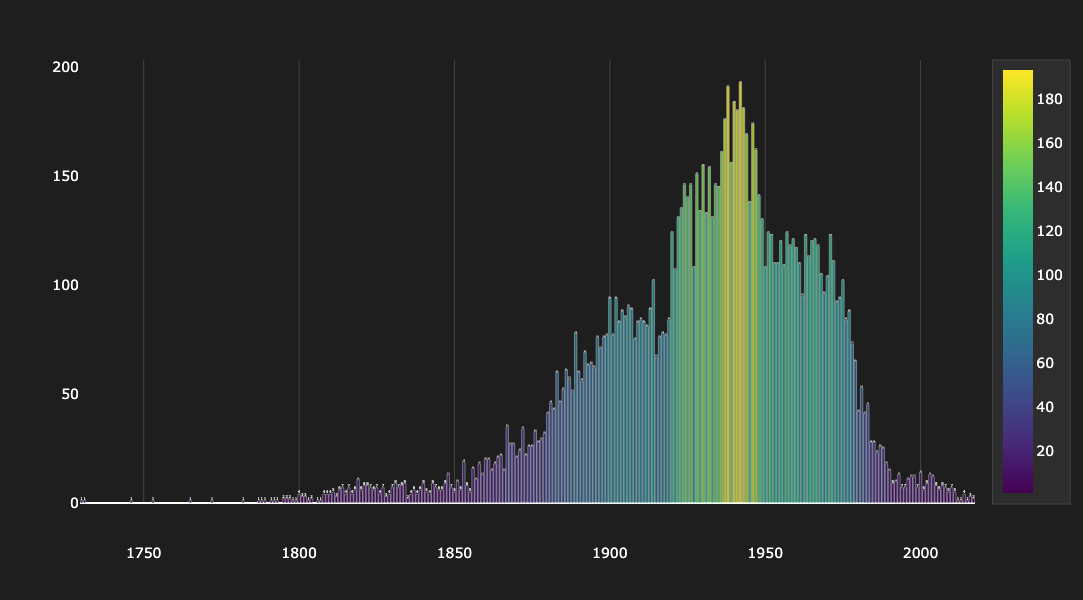

In [237]:
T2fig3 = px.bar(
    avg_birth,
    x='BeginDate',
    y='Count',
    text='Count',
    title="",
    color='Count',
    color_continuous_scale=px.colors.sequential.Viridis
)

T2fig3.update_traces(
    texttemplate='%{text:.0f}',
    textposition='outside',
    marker=dict(opacity=0.8)
)

T2fig3.update_layout(
    plot_bgcolor="#1E1E1E",
    paper_bgcolor="#1E1E1E",
    font=dict(color="#FFFFFF", size=14),
    title=dict(font=dict(size=40, color="#00CED1"), x=0.5),
    xaxis=dict(
        title="",
        color="#FFFFFF",
        gridcolor="#444444",
        zeroline=False,
        ticklabelstandoff=40
    ),
    yaxis=dict(
        title="",
        color="#FFFFFF",
        showgrid=False
    ),
    coloraxis_colorbar=dict(
        title="",
        tickcolor="#FFFFFF",
        titlefont=dict(color="#FFFFFF"),
        bgcolor="#2D2D2D",
        bordercolor="#444444",
        borderwidth=1
    ),
    height=600 
)

T2fig3.show()

In [240]:
avg_death = (artist_df.groupby('EndDate').size().reset_index(name='Count').sort_values(by='EndDate'))

In [241]:
avg_death = avg_death[avg_death['EndDate'] >= 1795]

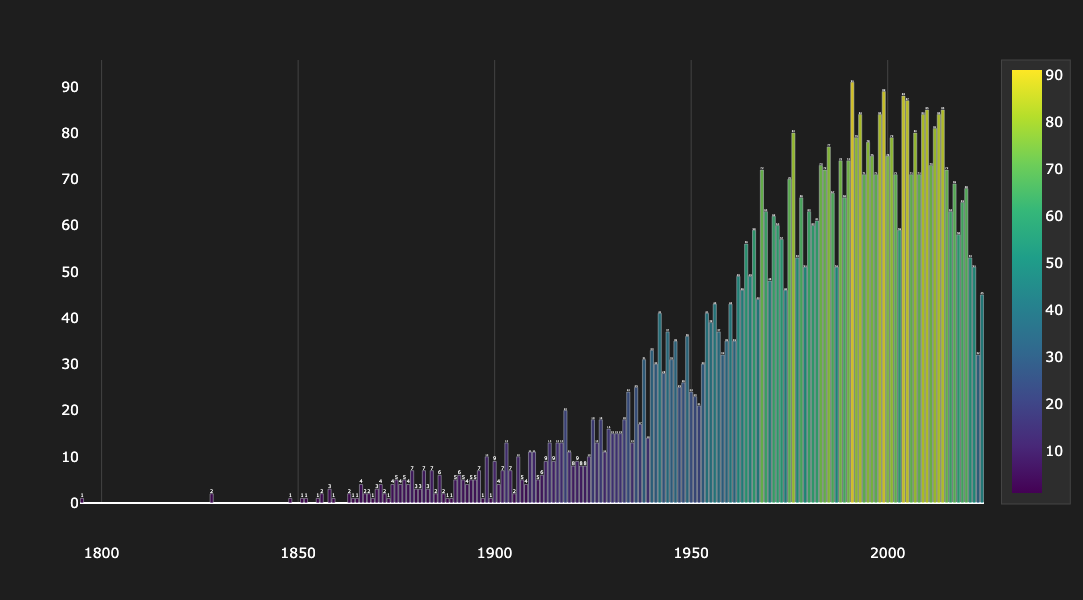

In [242]:
T2fig4 = px.bar(
    avg_death,
    x='EndDate',
    y='Count',
    text='Count',
    title="",
    color='Count',
    color_continuous_scale=px.colors.sequential.Viridis
)

T2fig4.update_traces(
    texttemplate='%{text:.0f}',
    textposition='outside',
    marker=dict(opacity=0.8)
)

T2fig4.update_layout(
    plot_bgcolor="#1E1E1E",
    paper_bgcolor="#1E1E1E",
    font=dict(color="#FFFFFF", size=14),
    title=dict(font=dict(size=40, color="#00CED1"), x=0.5),
    xaxis=dict(
        title="",
        color="#FFFFFF",
        gridcolor="#444444",
        zeroline=False,
        ticklabelstandoff=40
    ),
    yaxis=dict(
        title="",
        color="#FFFFFF",
        showgrid=False
    ),
    coloraxis_colorbar=dict(
        title="",
        tickcolor="#FFFFFF",
        titlefont=dict(color="#FFFFFF"),
        bgcolor="#2D2D2D",
        bordercolor="#444444",
        borderwidth=1
    ),
    height=600 
)

T2fig4.show()

In [64]:
artist_df.Nationality.nunique()

131

In [65]:
artist_df.Nationality.value_counts().iloc[100:]

Nationality
Trinidad and Tobagonian    2
Costa Rican                2
Paraguayan                 2
Bahamian                   2
Mozambican                 2
Estonian                   2
Azerbaijani                2
Ethiopian                  2
South Korean               2
Sri Lankan                 1
Sierra Leonean             1
Caribbean                  1
Hunkpapa Lakota            1
Burkinabé                  1
Indonesian                 1
Ivatan                     1
Nepali                     1
Beninese                   1
Afghan                     1
Persian                    1
Coptic                     1
Sahrawi                    1
Ugandan                    1
Kuwaiti                    1
Cambodian                  1
Ivorian                    1
Cypriot                    1
Jamaican American          1
Tanzanian                  1
Yugoslav                   1
Oneida                     1
Name: count, dtype: int64

In [66]:
nationality_to_country = {
    "American": "United States",
    "German": "Germany",
    "British": "United Kingdom",
    "French": "France",
    "Italian": "Italy",
    "Japanese": "Japan",
    "Swiss": "Switzerland",
    "Dutch": "Netherlands",
    "Russian": "Russia",
    "Austrian": "Austria",
    "Canadian": "Canada",
    "Brazilian": "Brazil",
    "Spanish": "Spain",
    "Mexican": "Mexico",
    "Argentine": "Argentina",
    "Polish": "Poland",
    "Swedish": "Sweden",
    "Danish": "Denmark",
    "Chinese": "China",
    "Belgian": "Belgium",
    "Czech": "Czech Republic",
    "Israeli": "Israel",
    "Chilean": "Chile",
    "Venezuelan": "Venezuela",
    "South African": "South Africa",
    "Cuban": "Cuba",
    "Colombian": "Colombia",
    "Finnish": "Finland",
    "Australian": "Australia",
    "Hungarian": "Hungary",
    "Indian": "India",
    "Norwegian": "Norway",
    "Peruvian": "Peru",
    "Croatian": "Croatia",
    "Korean": "South Korea",
    "Irish": "Ireland",
    "Uruguayan": "Uruguay",
    "Turkish": "Turkey",
    "Scottish": "United Kingdom",  
    "Romanian": "Romania",
    "Serbian": "Serbia",
    "Haitian": "Haiti",
    "Slovenian": "Slovenia",
    "New Zealander": "New Zealand",
    "Ukrainian": "Ukraine",
    "Puerto Rican": "Puerto Rico",
    "Iranian": "Iran",
    "Nigerian": "Nigeria",
    "Greek": "Greece",
    "Native American": "United States",
    "Icelandic": "Iceland",
    "Egyptian": "Egypt",
    "Portuguese": "Portugal",
    "Canadian Inuit": "Canada",
    "Lebanese": "Lebanon",
    "Slovak": "Slovakia",
    "Guatemalan": "Guatemala",
    "Moroccan": "Morocco",
    "Ecuadorian": "Ecuador",
    "Congolese": "Democratic Republic of the Congo",
    "Bosnian": "Bosnia and Herzegovina",
    "Georgian": "Georgia",
    "Taiwanese": "Taiwan",
    "Vietnamese": "Vietnam",
    "Kenyan": "Kenya",
    "Czechoslovakian": "Czechoslovakia", 
    "Pakistani": "Pakistan",
    "Bangladeshi": "Bangladesh",
    "Zimbabwean": "Zimbabwe",
    "Palestinian": "Palestine",
    "Bulgarian": "Bulgaria",
    "Filipino": "Philippines",
    "Macedonian": "North Macedonia",
    "Senegalese": "Senegal",
    "Thai": "Thailand",
    "Bolivian": "Bolivia",
    "Panamanian": "Panama",
    "Nicaraguan": "Nicaragua",
    "Luxembourger": "Luxembourg",
    "Malaysian": "Malaysia",
    "Albanian": "Albania",
    "Algerian": "Algeria",
    "Malian": "Mali",
    "Sudanese": "Sudan",
    "Ghanaian": "Ghana",
    "Lithuanian": "Lithuania",
    "Welsh": "United Kingdom", 
    "Latvian": "Latvia",
    "Singaporean": "Singapore",
    "English": "United Kingdom",
    "Salvadoran": "El Salvador",
    "Cameroonian": "Cameroon",
    "Kyrgyz": "Kyrgyzstan",
    "Iraqi": "Iraq",
    "Tunisian": "Tunisia",
    "Catalan": "Spain",  
    "Emirati": "United Arab Emirates",
    "Namibian": "Namibia",
    "Syrian": "Syria",
    "Trinidad and Tobagonian": "Trinidad and Tobago",
    "Costa Rican": "Costa Rica",
    "Paraguayan": "Paraguay",
    "Bahamian": "Bahamas",
    "Mozambican": "Mozambique",
    "Estonian": "Estonia",
    "Azerbaijani": "Azerbaijan",
    "Ethiopian": "Ethiopia",
    "South Korean": "South Korea",
    "Sri Lankan": "Sri Lanka",
    "Sierra Leonean": "Sierra Leone",
    "Caribbean": "Caribbean Region",
    "Hunkpapa Lakota": "United States",  # Native American nation
    "Burkinabé": "Burkina Faso",
    "Indonesian": "Indonesia",
    "Ivatan": "Philippines",  # Indigenous group in the Philippines
    "Nepali": "Nepal",
    "Beninese": "Benin",
    "Afghan": "Afghanistan",
    "Persian": "Iran",
    "Coptic": "Egypt",  # Religious/ethnic group in Egypt
    "Sahrawi": "Western Sahara",
    "Ugandan": "Uganda",
    "Kuwaiti": "Kuwait",
    "Cambodian": "Cambodia",
    "Ivorian": "Ivory Coast",
    "Cypriot": "Cyprus",
    "Jamaican American": "United States",  # Mixed identity, categorized to the U.S.
    "Tanzanian": "Tanzania",
    "Yugoslav": "Former Yugoslavia",  # Historical country
    "Oneida": "United States",  # Native American nation
}
artist_df["Country"] = artist_df["Nationality"].map(nationality_to_country)
artist_df

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN,EndDate2,FinalEndDate,lifespan,Country
0,1,Robert Arneson,"American, 1930–1992",American,male,1930,1992,NaN,NaN,NaN,1992,62.0,United States
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,male,1936,0,NaN,NaN,1936,1936,NaN,Spain
2,3,Bill Arnold,"American, born 1941",American,male,1941,0,NaN,NaN,1941,1941,NaN,United States
3,4,Charles Arnoldi,"American, born 1946",American,male,1946,0,Q1063584,500027998.0,1946,1946,NaN,United States
4,5,Per Arnoldi,"Danish, born 1941",Danish,male,1941,0,NaN,NaN,1941,1941,NaN,Denmark
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15633,138522,Erwin Heerich,"German, 1922 – 2004",German,male,1922,2004,NaN,NaN,NaN,2004,82.0,Germany
15634,138540,Rafael Rivera García,"Puerto Rican, 1929 – 2014",Puerto Rican,male,1929,2014,NaN,NaN,NaN,2014,85.0,Puerto Rico
15635,138541,Rafael López del Campo,"Puerto Rican, 1936 – 2009",Puerto Rican,male,1936,2009,NaN,NaN,NaN,2009,73.0,Puerto Rico
15636,138544,Efrain Lopez,"Puerto Rican, 1940 – 1993",Puerto Rican,male,1940,1993,NaN,NaN,NaN,1993,53.0,Puerto Rico


In [67]:
nationality_counts = artist_df['Country'].value_counts().reset_index()
nationality_counts.columns = ['Country', 'Count']

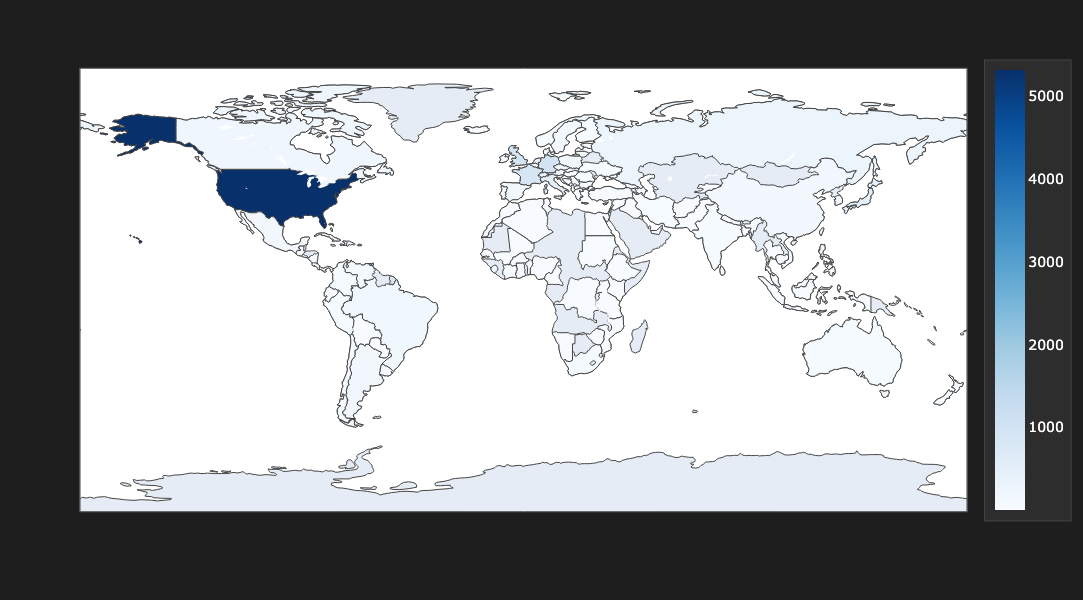

In [231]:
T2fig5 = px.choropleth(
    nationality_counts,
    locations='Country',  
    locationmode='country names',  
    color='Count',  
    hover_name='Country',
    title="",
    color_continuous_scale=px.colors.sequential.Blues,  
    height=600 

)

T2fig5.update_layout(
    plot_bgcolor="#1E1E1E",  
    paper_bgcolor="#1E1E1E", 
    font=dict(color="#FFFFFF", size=14), 
    title=dict(font=dict(size=40, color="#00CED1"), x=0.5),  
    coloraxis_colorbar=dict(
        title="",
        tickcolor="#FFFFFF",
        titlefont=dict(color="#FFFFFF"),
        bgcolor="#2D2D2D",
        bordercolor="#444444",
        borderwidth=1,

    )
)

T2fig5.show()

In [69]:
nationality_counts_woUS = artist_df['Country'].value_counts().reset_index()
nationality_counts_woUS.columns = ['Country', 'Count']
nationality_counts_woUS = nationality_counts_woUS[nationality_counts_woUS['Country'] != 'United States']

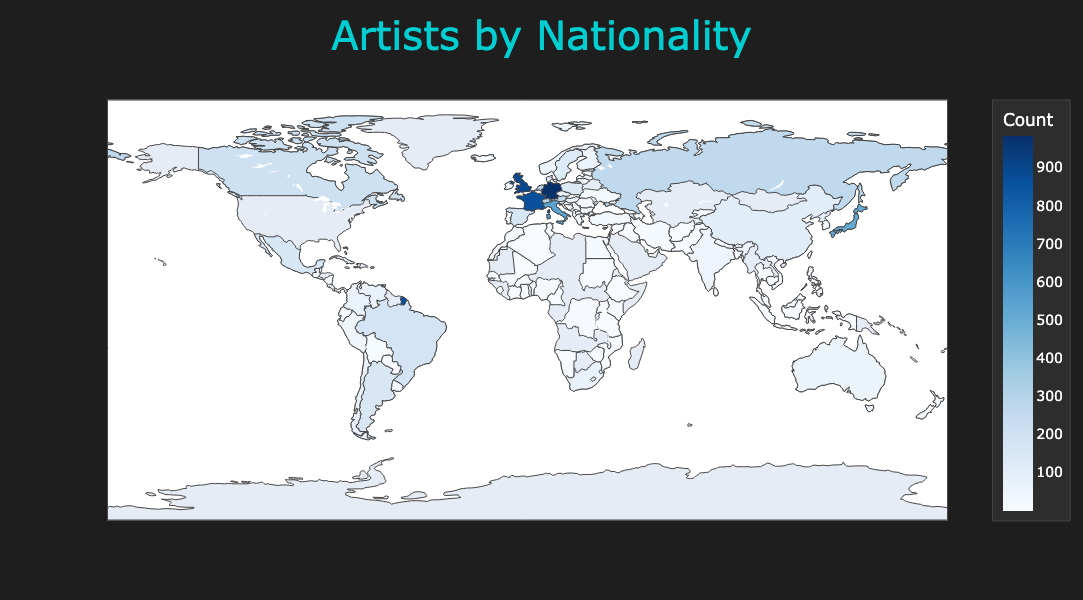

In [70]:
T2fig55 = px.choropleth(
    nationality_counts_woUS,
    locations='Country', 
    locationmode='country names',  
    color='Count',  
    hover_name='Country', 
    title="Artists by Nationality",
    color_continuous_scale=px.colors.sequential.Blues,  
    height=600 

)

T2fig55.update_layout(
    plot_bgcolor="#1E1E1E",  
    paper_bgcolor="#1E1E1E", 
    font=dict(color="#FFFFFF", size=14),  
    title=dict(font=dict(size=40, color="#00CED1"), x=0.5),  
    coloraxis_colorbar=dict(
        title="Count",
        tickcolor="#FFFFFF",
        titlefont=dict(color="#FFFFFF"),
        bgcolor="#2D2D2D",
        bordercolor="#444444",
        borderwidth=1,

    )
)

T2fig55.show()

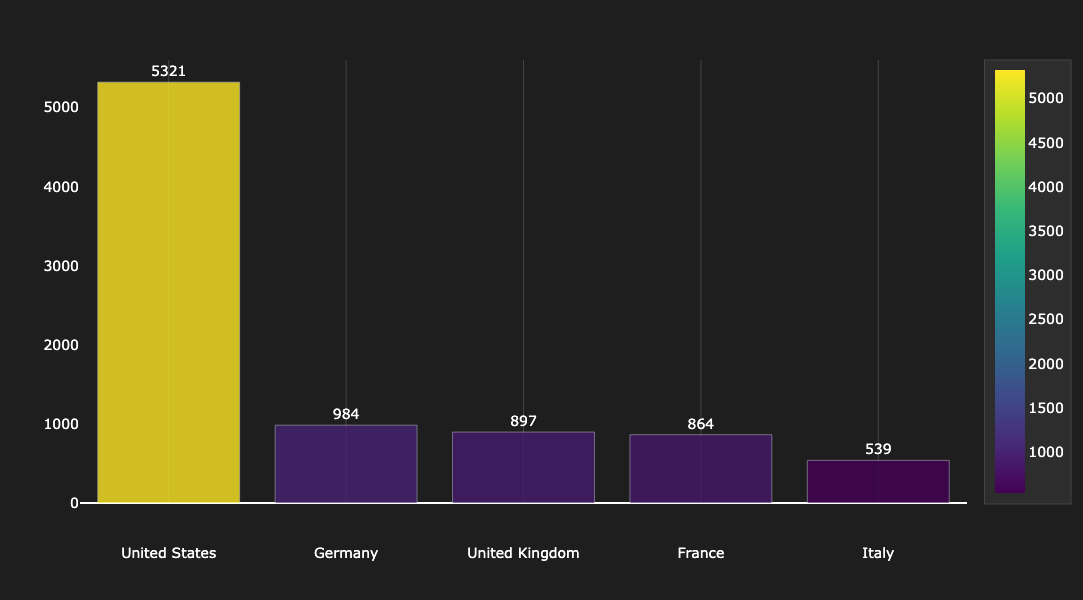

In [232]:
top_countries = artist_df['Country'].value_counts().head(5).reset_index()
top_countries.columns = ['Country', 'Count']
T1fig6 = px.bar(
    top_countries,
    x='Country',
    y='Count',
    text='Count',
    title="",
    color='Count',
    color_continuous_scale=px.colors.sequential.Viridis
)

T1fig6.update_traces(
    texttemplate='%{text:.0f}',
    textposition='outside',
    marker=dict(opacity=0.8)
)

T1fig6.update_layout(
    plot_bgcolor="#1E1E1E",
    paper_bgcolor="#1E1E1E",
    font=dict(color="#FFFFFF", size=14),
    title=dict(font=dict(size=40, color="#00CED1"), x=0.5),
    xaxis=dict(
        title="",
        color="#FFFFFF",
        gridcolor="#444444",
        zeroline=False,
        ticklabelstandoff=40
    ),
    yaxis=dict(
        title="",
        color="#FFFFFF",
        showgrid=False
    ),
    coloraxis_colorbar=dict(
        title="",
        tickcolor="#FFFFFF",
        titlefont=dict(color="#FFFFFF"),
        bgcolor="#2D2D2D",
        bordercolor="#444444",
        borderwidth=1
    ),
    height=600 
)

T1fig6.show()

# T3

In [72]:
artwork_df

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.),painting_size,decades
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),Male,1896.0,Ink and cut-and-pasted painted pages on paper,...,NaN,NaN,48.600000,NaN,NaN,168.900000,NaN,NaN,8208.540000,1890.0
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),Male,1987.0,Paint and colored pencil on print,...,NaN,NaN,40.640100,NaN,NaN,29.845100,NaN,NaN,1212.907849,1980.0
2,"Villa project, outside Vienna, Austria (Elevat...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),Male,1903.0,"Graphite, pen, color pencil, ink, and gouache ...",...,NaN,NaN,34.300000,NaN,NaN,31.800000,NaN,NaN,1090.740000,1900.0
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),Male,1980.0,Photographic reproduction with colored synthet...,...,NaN,NaN,50.800000,NaN,NaN,50.800000,NaN,NaN,2580.640000,1980.0
4,"Villa project, outside Vienna, Austria (Exteri...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),Male,1903.0,"Graphite, color pencil, ink, and gouache on tr...",...,NaN,NaN,38.400000,NaN,NaN,19.100000,NaN,NaN,733.440000,1900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157625,Untitled,Adam Pendleton,38901,"(American, born 1984)",(American),(1984),(0),Male,2021.0,Silkscreen ink on Mylar,...,NaN,NaN,96.520193,NaN,NaN,73.660147,NaN,NaN,7109.691639,2020.0
157626,Untitled,Adam Pendleton,38901,"(American, born 1984)",(American),(1984),(0),Male,2021.0,Silkscreen ink on Mylar,...,NaN,NaN,96.520193,NaN,NaN,73.660147,NaN,NaN,7109.691639,2020.0
157627,Untitled,Adam Pendleton,38901,"(American, born 1984)",(American),(1984),(0),Male,2021.0,Silkscreen ink on Mylar,...,NaN,NaN,96.520193,NaN,NaN,73.660147,NaN,NaN,7109.691639,2020.0
157628,Untitled,Adam Pendleton,38901,"(American, born 1984)",(American),(1984),(0),Male,2021.0,Silkscreen ink on Mylar,...,NaN,NaN,96.520193,NaN,NaN,73.660147,NaN,NaN,7109.691639,2020.0


In [73]:
top_three_artists = artwork_df['Artist'].value_counts().head(3).reset_index()
top_three_artists.columns = ['Artist', 'Count']
top_three_artists = artwork_df['Title'].value_counts().head(3).reset_index()
top_three_artists.columns = ['Title', 'Count']
top_medium = artwork_df['Medium'].value_counts().head(1).reset_index()
top_medium.columns = ['Medium', 'Count']
gender_counts = artwork_df['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']
top_classification = artwork_df['Medium'].value_counts().head(1).reset_index()
top_classification.columns = ['Medium', 'Count']

In [77]:
# Data Prep
top_three_artists = artwork_df['Artist'].value_counts().head(3).reset_index()
top_three_artists.columns = ['Artist', 'Count']
top_titles = artwork_df['Title'].value_counts().head(3).reset_index()
top_titles.columns = ['Title', 'Count']
top_medium = artwork_df['Medium'].value_counts().head(1).reset_index()
top_medium.columns = ['Medium', 'Count']
gender_counts = artwork_df['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']
unique_decades = sorted(artwork_df['decades'].unique())

# Dash app
app2 = Dash(__name__)

app2.layout = html.Div([
    html.H1("Artwork Dashboard", style={'textAlign': 'center'}),
    
    # Slider
    dcc.Slider(
        id='decade-slider',
        min=1760,
        max=max(unique_decades),
        step=10,
        marks={decade: str(decade) for decade in unique_decades},
        value=min(unique_decades),
        tooltip={"placement": "bottom", "always_visible": True}
    ),

    html.Div([
        dcc.Graph(id='fig-top-artists'),  
        dcc.Graph(id='fig-top-titles')  
    ], style={'display': 'flex', 'justifyContent': 'space-around', 'alignItems': 'center'}),
    
    html.Div([
        dcc.Graph(id='fig-top-medium'),  
        dcc.Graph(id='fig-gender-counts')  
    ], style={'display': 'flex', 'justifyContent': 'space-around', 'alignItems': 'center'})
])

@app2.callback(
    [
        Output('fig-top-artists', 'figure'),
        Output('fig-top-titles', 'figure'),
        Output('fig-top-medium', 'figure'),
        Output('fig-gender-counts', 'figure')
    ],
    [Input('decade-slider', 'value')]
)
def update_figures(selected_decade):
    filtered_df = artwork_df[artwork_df['decades'] == selected_decade]
    
    # Top 3 Artists
    filtered_artists = filtered_df['Artist'].value_counts().head(3).reset_index()
    filtered_artists.columns = ['Artist', 'Count']
    fig_top_artists = px.bar(
        filtered_artists,
        x='Artist',
        y='Count',
        text='Count',
        title=f"Top 3 Artists ({selected_decade})",
        color='Count',
        color_continuous_scale='Viridis'
    )
    fig_top_artists.update_traces(texttemplate='%{text:.0f}', textposition='outside')
    fig_top_artists.update_layout(title_x=0.5)

    # Top 3 Titles
    filtered_titles = filtered_df['Title'].value_counts().head(3).reset_index()
    filtered_titles.columns = ['Title', 'Count']
    fig_top_titles = px.bar(
        filtered_titles,
        x='Title',
        y='Count',
        text='Count',
        title=f"Top 3 Titles ({selected_decade})",
        color='Count',
        color_continuous_scale='Viridis'
    )
    fig_top_titles.update_traces(texttemplate='%{text:.0f}', textposition='outside')
    fig_top_titles.update_layout(title_x=0.5)

    # Top Medium
    filtered_medium = filtered_df['Medium'].value_counts().head(1).reset_index()
    filtered_medium.columns = ['Medium', 'Count']
    fig_top_medium = px.bar(
        filtered_medium,
        x='Medium',
        y='Count',
        text='Count',
        title=f"Most Common Medium ({selected_decade})",
        color='Count',
        color_continuous_scale='Viridis'
    )
    fig_top_medium.update_traces(texttemplate='%{text:.0f}', textposition='outside')
    fig_top_medium.update_layout(title_x=0.5)

    filtered_gender_counts = filtered_df['Gender'].value_counts().reset_index()
    filtered_gender_counts.columns = ['Gender', 'Count']

    fig_gender_counts = px.pie(
    filtered_gender_counts,
    names='Gender',  
    values='Count',  
    title=f"Gender Distribution ({selected_decade})",  
    )

    
    fig_gender_counts.update_traces(
    textinfo='none'  
    )
    fig_gender_counts.update_layout(
    title_x=0.5,  
    font=dict(size=14, color="#FFFFFF"),
    paper_bgcolor="#1E1E1E", 
    plot_bgcolor="#1E1E1E"  
    )

    return fig_top_artists, fig_top_titles, fig_top_medium, fig_gender_counts


if __name__ == '__main__':
    app2.run_server(debug=True)

# Total App

In [247]:
app = dash.Dash(__name__)
server = app.server
app.layout = html.Div(
    style={
        'backgroundColor': '#1E1E1E',  
        'color': '#FFFFFF',           
        'fontFamily': 'Arial, sans-serif',
        'padding': '20px',
    },
    children=[
        html.H1(
            "Museum of Modern Art", 
            style={'textAlign': 'center', 'color': '#00CED1', 'fontSize': '50px'}
        ),
        dcc.Tabs(
            style={
                'backgroundColor': '#2D2D2D',
                'color': '#FFFFFF',
                'border': '1px solid #3E3E3E',
                'fontSize': '16px',
                'padding': '10px',
            },
            children=[
                # Tab 1: About the Museum
                dcc.Tab(
                    label="About the Museum",
                    style={
                        'backgroundColor': '#2D2D2D',
                        'border': '1px solid #3E3E3E',
                        'color': '#FFFFFF',
                        'padding': '10px',
                        'fontWeight': 'bold',
                    },
                    selected_style={
                        'backgroundColor': '#444444',
                        'border': '1px solid #00CED1',
                        'color': '#00CED1',
                        'padding': '10px',
                        'fontWeight': 'bold',
                    },
                    children=[
                        html.Div([
                            html.Div(
                                style={
                                    'display': 'flex',
                                    'justifyContent': 'center',
                                    'alignItems': 'center',
                                    'flexWrap': 'nowrap',
                                    'gap': '20px',
                                    'marginBottom': '30px',
                                },
                                children=[
                                    combined_card_1(metrics={
                                        "artist_num_feats": artist_num_feats,
                                        "artwork_num_feats": artwork_num_feats,
                                        "memory": memory,
                                    }),
                                    combined_card_2(metrics={"num_artists": num_artists}),
                                    combined_card_3(metrics={"num_artworks": num_artworks}),
                                    combined_card_4(metrics={"num_nationalities": num_nationalities}),
                                    combined_card_5(metrics={"num_classifications": num_classifications}),
                                ]
                            ),
                            html.Div(
                                style={
                                    'display': 'grid',
                                    'gridTemplateColumns': 'repeat(2, 1fr)',
                                    'gap': '20px',
                                    'margin': '20px',
                                },
                                children=[
                                    html.Div([
                                        html.H3(
                                            "Average Painting Sizes (cm) by Decade", 
                                            style={'textAlign': 'center', 'color': '#00CED1'}
                                        ),
                                        dcc.Graph(figure=T1fig1, style={'backgroundColor': '#1E1E1E'})
                                    ]),
                                    html.Div([
                                        html.H3(
                                            "Average Acquisitions by Decade", 
                                            style={'textAlign': 'center', 'color': '#00CED1'}
                                        ),
                                        dcc.Graph(figure=T1fig2, style={'backgroundColor': '#1E1E1E'})
                                    ]),
                                    html.Div([
                                        html.H3(
                                            "Top 5 Classifications", 
                                            style={'textAlign': 'center', 'color': '#00CED1'}
                                        ),
                                        dcc.Graph(figure=T1fig3, style={'backgroundColor': '#1E1E1E'})
                                    ]),
                                    html.Div([
                                        html.H3(
                                            "Acquisitions over the Years", 
                                            style={'textAlign': 'center', 'color': '#00CED1'}
                                        ),
                                        dcc.Graph(figure=T1fig5, style={'backgroundColor': '#1E1E1E'})
                                    ])
                                ]
                            )
                        ])
                    ]
                ),
                # Tab 2: Insights
                dcc.Tab(
                    label="Insights",
                    style={
                        'backgroundColor': '#2D2D2D',
                        'border': '1px solid #3E3E3E',
                        'color': '#FFFFFF',
                        'padding': '10px',
                        'fontWeight': 'bold',
                    },
                    selected_style={
                        'backgroundColor': '#444444',
                        'border': '1px solid #00CED1',
                        'color': '#00CED1',
                        'padding': '10px',
                        'fontWeight': 'bold',
                    },
                    children=[
                        html.Div(
                            style={
                                'backgroundColor': '#1E1E1E',
                                'padding': '20px',
                                'borderRadius': '10px',
                                'boxShadow': '0px 4px 10px rgba(0, 0, 0, 0.5)',
                            },
                            children=[
                                html.H1(
                                    "",
                                    style={
                                        'textAlign': 'center',
                                        'color': '#00CED1',
                                        'marginBottom': '20px'
                                    }
                                ),
                                html.Div(
                                    style={
                                        'display': 'grid',
                                        'gridTemplateColumns': 'repeat(2, 1fr)',
                                        'gap': '20px',
                                        'marginTop': '20px',
                                    },
                                    children=[
                                        html.Div([
                                            html.H3(
                                                "Gender Pie",
                                                style={
                                                    'textAlign': 'center',
                                                    'color': '#00CED1',
                                                    'marginBottom': '10px'
                                                }
                                            ),
                                            dcc.Graph(figure=T2fig1, style={'backgroundColor': '#1E1E1E'})
                                        ]),
                                        html.Div([
                                            html.H3(
                                                "Map of Artists Origins",
                                                style={
                                                    'textAlign': 'center',
                                                    'color': '#00CED1',
                                                    'marginBottom': '10px'
                                                }
                                            ),
                                            dcc.Graph(figure=T2fig5, style={'backgroundColor': '#1E1E1E'})
                                        ]),
                                        html.Div([
                                            html.H3(
                                                "Average Lifespan",
                                                style={
                                                    'textAlign': 'center',
                                                    'color': '#00CED1',
                                                    'marginBottom': '10px'
                                                }
                                            ),
                                            dcc.Graph(figure=T2fig2, style={'backgroundColor': '#1E1E1E'})
                                        ]),
                                        html.Div([
                                            html.H3(
                                                "Count of Countries",
                                                style={
                                                    'textAlign': 'center',
                                                    'color': '#00CED1',
                                                    'marginBottom': '10px'
                                                }
                                            ),
                                            dcc.Graph(figure=T1fig6, style={'backgroundColor': '#1E1E1E'})
                                        ]),
                                        html.Div([
                                            html.H3(
                                                "Births",
                                                style={
                                                    'textAlign': 'center',
                                                    'color': '#00CED1',
                                                    'marginBottom': '10px'
                                                }
                                            ),
                                            dcc.Graph(figure=T2fig3, style={'backgroundColor': '#1E1E1E'})
                                        ]),
                                        html.Div([
                                            html.H3(
                                                "Deaths",
                                                style={
                                                    'textAlign': 'center',
                                                    'color': '#00CED1',
                                                    'marginBottom': '10px'
                                                }
                                            ),
                                            dcc.Graph(figure=T2fig4, style={'backgroundColor': '#1E1E1E'})
                                        ]),
                                    ]
                                )
                            ]
                        )
                    ]
                ),
                # Tab 3: Artists by Decade
                dcc.Tab(
    label="Throughout the Decades",
    style={
        'backgroundColor': '#2D2D2D',
        'border': '1px solid #3E3E3E',
        'color': '#FFFFFF',
        'padding': '10px',
        'fontWeight': 'bold',
    },
    selected_style={
        'backgroundColor': '#444444',
        'border': '1px solid #00CED1',
        'color': '#00CED1',
        'padding': '10px',
        'fontWeight': 'bold',
    },
    children=[
        html.Div([
            html.H1("", style={'textAlign': 'center', 'color': '#00CED1'}),
            
            # Decade Slider
            dcc.Slider(
                id='decade-slider',
                min=1760,
                max=2020,
                step=10,
                marks={i: str(i) for i in range(1760, 2030, 10)},
                value=1920,
                tooltip={"placement": "bottom", "always_visible": True}
            ), 

# Graphs
html.Div([
    dcc.Graph(id='fig-top-artists'),
    dcc.Graph(id='fig-top-titles')
], style={'display': 'flex', 'justifyContent': 'space-around', 'alignItems': 'center'}),

html.Div([
    dcc.Graph(id='fig-top-medium'),
    dcc.Graph(id='fig-gender-counts')
], style={'display': 'flex', 'justifyContent': 'space-around', 'alignItems': 'center'}),
        ])
    ]
),
            ]
        )
    ]
)
@app.callback(
    [
        Output('fig-top-artists', 'figure'),
        Output('fig-top-titles', 'figure'),
        Output('fig-top-medium', 'figure'),
        Output('fig-gender-counts', 'figure')
    ],
    [Input('decade-slider', 'value')]
)
def update_figures(selected_decade):
    # Filter data by selected decade
    filtered_df = artwork_df[artwork_df['decades'] == selected_decade]

    # Top 3 Artists
    filtered_artists = filtered_df['Artist'].value_counts().head(3).reset_index()
    filtered_artists.columns = ['Artist', 'Count']
    fig_top_artists = px.bar(
        filtered_artists,
        x='Artist',
        y='Count',
        text='Count',
        title=f"Top 3 Artists ({selected_decade})",
        color='Count',
        color_continuous_scale='Viridis'
    )
    fig_top_artists.update_traces(texttemplate='%{text:.0f}', textposition='outside')
    fig_top_artists.update_layout(
        title_x=0.5,
        font=dict(size=14, color="#FFFFFF"),
        paper_bgcolor="#1E1E1E",
        plot_bgcolor="#1E1E1E"
    )

    # Top 3 Titles
    filtered_titles = filtered_df[filtered_df['Title'] != 'Untitled']  
    filtered_titles = filtered_titles['Title'].value_counts().head(3).reset_index()
    filtered_titles.columns = ['Title', 'Count'] 
    fig_top_titles = px.bar(
        filtered_titles,
        x='Title',
        y='Count',
        text='Count',
        title=f"Top 3 Titles ({selected_decade})",
        color='Count',
        color_continuous_scale='Viridis'
    )
    fig_top_titles.update_traces(texttemplate='%{text:.0f}', textposition='outside')
    fig_top_titles.update_layout(
        title_x=0.5,
        font=dict(size=14, color="#FFFFFF"),
        paper_bgcolor="#1E1E1E",
        plot_bgcolor="#1E1E1E"
    )

    # Top Medium
    filtered_medium = filtered_df['Medium'].value_counts().head(1).reset_index()
    filtered_medium.columns = ['Medium', 'Count']
    fig_top_medium = px.bar(
        filtered_medium,
        x='Medium',
        y='Count',
        text='Count',
        title=f"Most Common Medium ({selected_decade})",
        color='Count',
        color_continuous_scale='Viridis'
    )
    fig_top_medium.update_traces(texttemplate='%{text:.0f}', textposition='outside')
    fig_top_medium.update_layout(
        title_x=0.5,
        font=dict(size=14, color="#FFFFFF"),
        paper_bgcolor="#1E1E1E",
        plot_bgcolor="#1E1E1E"
    )

    # Gender Distribution (Pie Chart)
    filtered_gender_counts = filtered_df['Gender'].value_counts().reset_index()
    filtered_gender_counts.columns = ['Gender', 'Count']
    fig_gender_counts = px.pie(
        filtered_gender_counts,
        names='Gender',
        values='Count',
        title=f"Gender Distribution ({selected_decade})"
    )
    fig_gender_counts.update_traces(textinfo='none')
    fig_gender_counts.update_layout(
        title_x=0.5,
        font=dict(size=14, color="#FFFFFF"),
        paper_bgcolor="#1E1E1E",
        plot_bgcolor="#1E1E1E"
    )

    return fig_top_artists, fig_top_titles, fig_top_medium, fig_gender_counts


if __name__ == '__main__':
    app.run_server(debug=True)